In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
original_data = pd.read_csv('spotify-2023.csv',encoding=('ISO-8859-1'),low_memory=False)

In [3]:
data = original_data.copy()

column key and in_shazam_chart have null value 

Harus dicek kembali, apakah ada beberapa kolom data yang harusnya numerik tapi malah tipe datanya object

# Data Cleansing and Preparation

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [5]:
object_type_data = data.select_dtypes(include=['object'])
object_type_data.head()

,track_name,artist(s)_name,streams,in_deezer_playlists,in_shazam_charts,key,mode
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",141381703,45,826,B,Major
1,LALA,Myke Towers,133716286,58,382,C#,Major
2,vampire,Olivia Rodrigo,140003974,91,949,F,Major
3,Cruel Summer,Taylor Swift,800840817,125,548,A,Major
4,WHERE SHE GOES,Bad Bunny,303236322,87,425,A,Minor


In [6]:
data.rename(columns = {
    'danceability_%':'danceability', 
    'valence_%':'valence',
    'energy_%':'energy',
    'acousticness_%':'acousticness',
    'instrumentalness_%':'instrumentalness',
    'liveness_%':'liveness',
    'speechiness_%':'speechiness'}, inplace = True)

In [42]:
data = data.dropna(axis=0, how='any')
#drop all rows contains missing values

In [8]:
data['key'].unique()

array(['B', 'C#', 'F', 'A', 'D', 'F#', 'G#', 'G', 'E', 'A#', 'D#'],
      dtype=object)

In [9]:
key_encoding = {
    'B':0,
    'C#':1,
    'F':2,
    'A':3,
    'D':4,
    'F#':5,
    'G#':6,
    'G':7,
    'E':8,
    'A#':9,
    'D#':10,
}
mode_encoding = {
    'Major':0,
    'Minor':1,
        
}

In [10]:
data['key'] = data['key'].replace(key_encoding, inplace=True)
data['mode'] = data['mode'].replace(mode_encoding, inplace=True)
#key and mode feature is encoded by the dicts that was made above

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            817 non-null    object
 1   artist(s)_name        817 non-null    object
 2   artist_count          817 non-null    int64 
 3   released_year         817 non-null    int64 
 4   released_month        817 non-null    int64 
 5   released_day          817 non-null    int64 
 6   in_spotify_playlists  817 non-null    int64 
 7   in_spotify_charts     817 non-null    int64 
 8   streams               817 non-null    object
 9   in_apple_playlists    817 non-null    int64 
 10  in_apple_charts       817 non-null    int64 
 11  in_deezer_playlists   817 non-null    object
 12  in_deezer_charts      817 non-null    int64 
 13  in_shazam_charts      817 non-null    object
 14  bpm                   817 non-null    int64 
 15  key                   0 non-null      ob

In [12]:
data.replace('BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3','520034544' , inplace=True)
#remove unproper value in data

In [14]:
data['streams'] = data['streams'].apply(np.int64)
data['in_shazam_charts'] = data['in_shazam_charts'].replace({'\$':'',',':''}, regex = True)
data['in_shazam_charts'] = data['in_shazam_charts'].apply(np.int64)
data['in_deezer_playlists'] = data['in_deezer_playlists'].replace({'\$':'',',':''}, regex = True)
data['in_deezer_playlists'] = data['in_deezer_playlists'].apply(np.int64)
#some types of columns is changed to the numeric (int or float)

# EDA (Exploratory Data Analysis)

Text(0.5, 1.0, 'Most Number Musics by the Artist(s)')

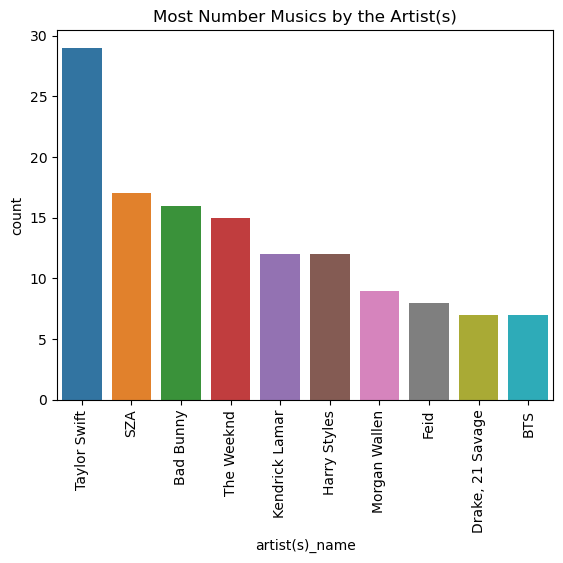

In [15]:
sns.countplot(data, x="artist(s)_name", order=pd.value_counts(data['artist(s)_name']).iloc[:10].index)
plt.xticks(rotation=90)
plt.title("Most Number Musics by the Artist(s)")

Songs by Taylor Swift are the most song in the list

Text(0.5, 1.0, 'Artist in one song')

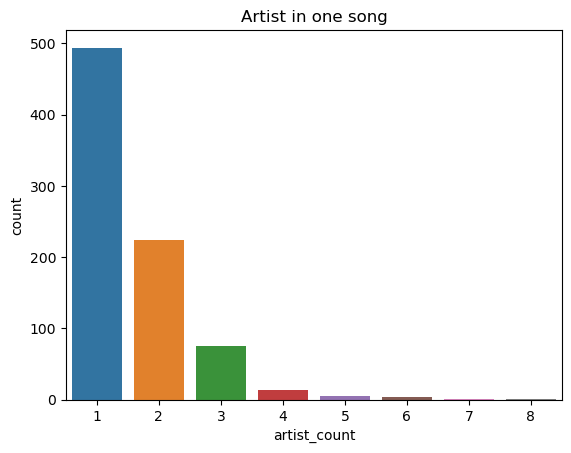

In [16]:
sns.countplot(data=data,x='artist_count')
plt.title("Artist in one song")

Text(0.5, 1.0, 'Top 10 Most Streamed Song (until 2023)')

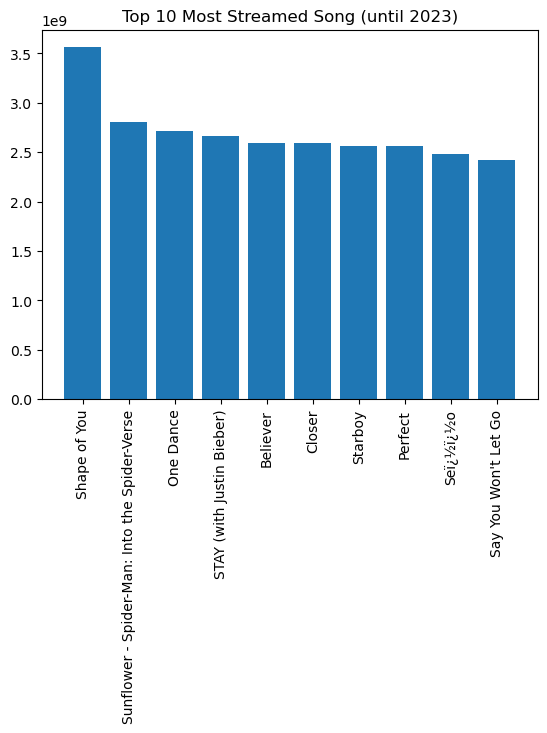

In [17]:
most_listened = data.sort_values(by='streams',ascending=False)
name = most_listened['track_name'].head(12)
price = most_listened['streams'].head(12)
plt.bar(name[0:10], price[0:10])
plt.xticks(rotation=90)
plt.title("Top 10 Most Streamed Song (until 2023)")

Shape of You merupakan lagu yang masih paling seering didengar di spotify hingga saat ini, meskipun tidak berada di top chart

<AxesSubplot: xlabel='key', ylabel='count'>

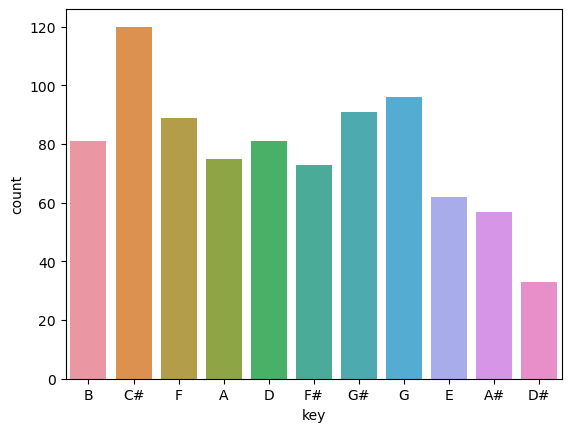

In [18]:
sns.countplot(data=original_data,x='key')

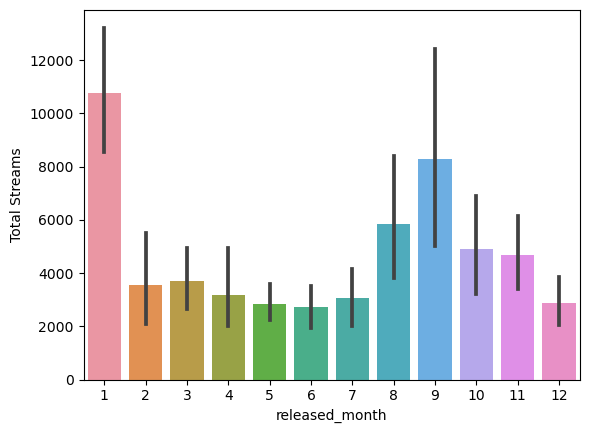

In [19]:
sns.barplot(x = "released_month", y = "in_spotify_playlists", data=data, estimator = "mean");
plt.ylabel("Total Streams")
plt.show()

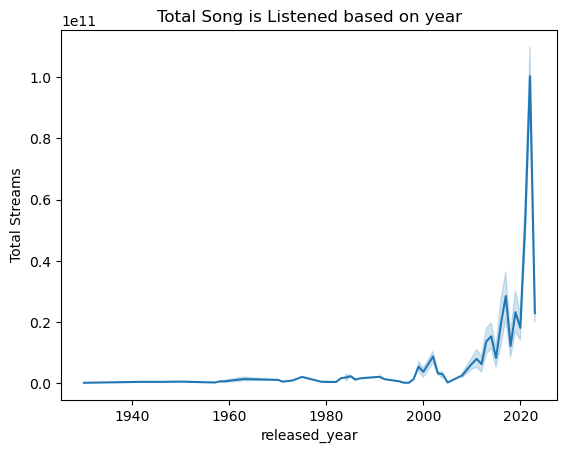

In [20]:
sns.lineplot(x = "released_year", y = "streams", data=data, estimator = "sum");
plt.ylabel("Total Streams")
plt.title("Total Song is Listened based on year")
plt.show()

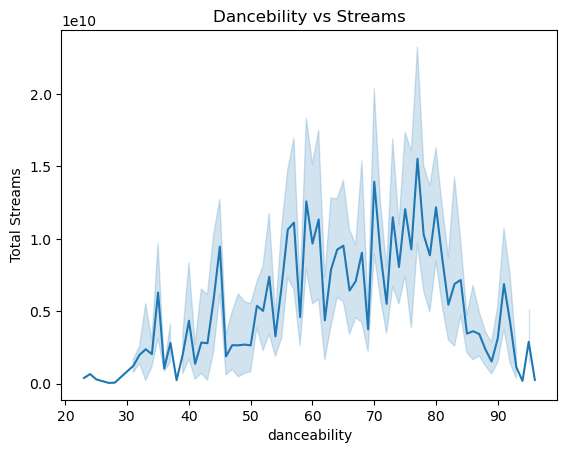

In [21]:
sns.lineplot(x = "danceability", y = "streams", data=data, estimator = "sum");
plt.ylabel("Total Streams")
plt.title("Dancebility vs Streams")
plt.show()

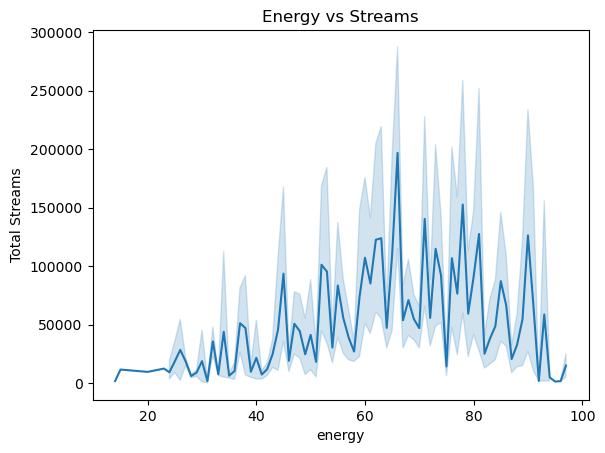

In [22]:
sns.lineplot(x = "energy", y = "in_spotify_playlists", data=data, estimator = "sum");
plt.ylabel("Total Streams")
plt.title("Energy vs Streams")
plt.show()

In [23]:
data.sort_values(by='in_spotify_playlists',ascending=False)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness
757,Get Lucky - Radio Edit,"Pharrell Williams, Nile Rodgers, Daft Punk",3,2013,1,1,52898,0,933815613,203,...,116,None,None,79,87,81,4,0,10,4
630,Mr. Brightside,The Killers,1,2003,9,23,51979,15,1806617704,306,...,148,None,None,35,24,93,0,0,10,8
720,Wake Me Up - Radio Edit,Avicii,1,2013,1,1,50887,34,1970673297,315,...,124,None,None,53,66,78,0,0,16,5
624,Smells Like Teen Spirit - Remastered 2021,Nirvana,1,1991,9,10,49991,9,1690192927,265,...,117,None,None,52,73,91,0,0,11,7
199,Take On Me,a-ha,1,1984,10,19,44927,17,1479115056,34,...,84,None,None,57,86,90,2,0,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,New Jeans,NewJeans,1,2023,7,7,77,35,29562220,8,...,134,None,None,81,53,72,51,0,12,5
185,Cheques,Shubh,1,2023,5,19,67,8,47956378,7,...,90,None,None,74,36,63,26,0,27,5
112,LAGUNAS,"Jasiel Nuï¿½ï¿½ez, Peso P",2,2023,6,22,58,18,39058561,2,...,116,None,None,77,79,62,33,1,15,3
327,Peaches (from The Super Mario Bros. Movie),Jack Black,1,2023,4,7,34,0,68216992,0,...,92,None,None,71,41,31,79,0,10,5


In [24]:
correlation_data_numeric = data[['streams','bpm','danceability','valence','energy','acousticness','instrumentalness','liveness']]
numeric_data = correlation_data_numeric

<AxesSubplot: >

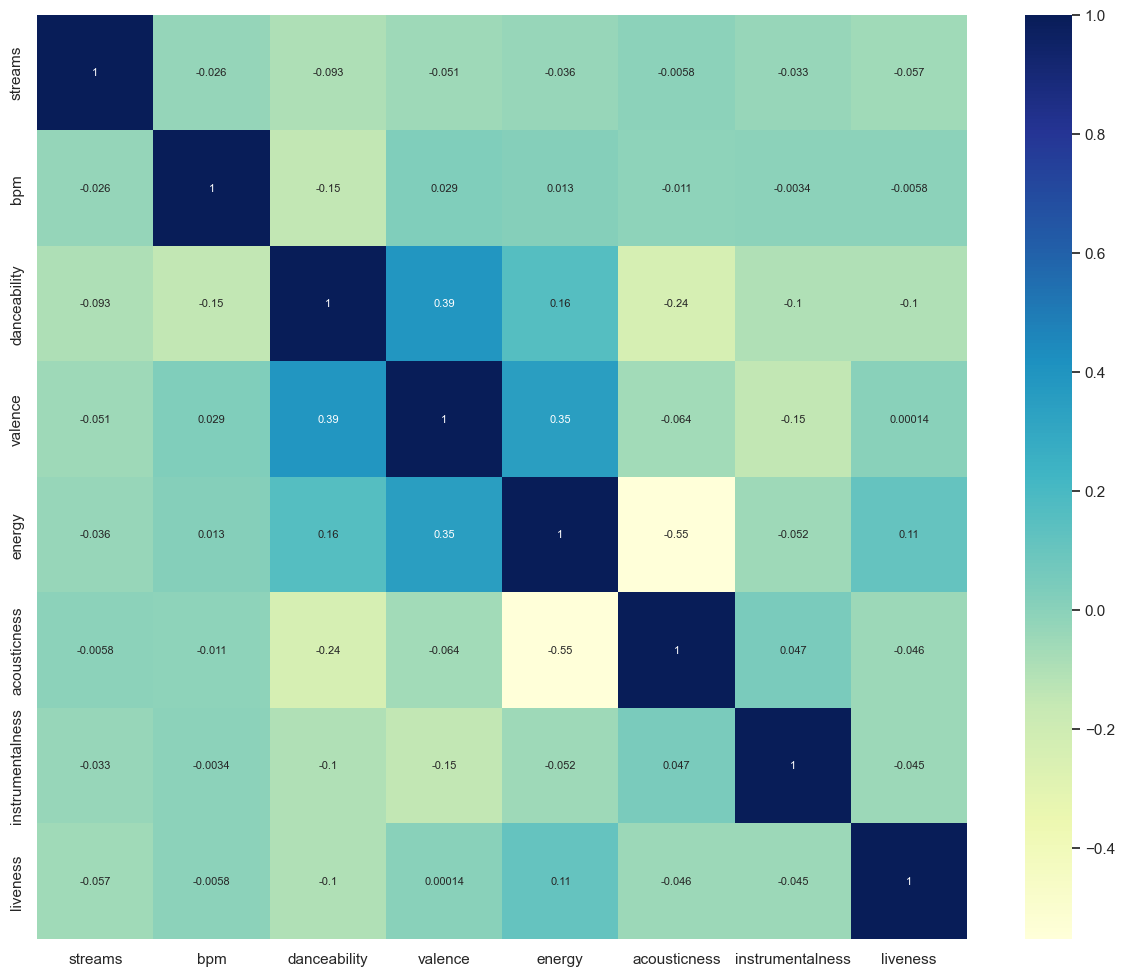

In [25]:
corr = correlation_data_numeric.corr()
sns.set(rc={'figure.figsize':(15,12)})
sns.heatmap(corr, cmap="YlGnBu", annot=True, annot_kws={"size": 8})

-acousticness is less energy for a song
-The songs which on dancebility have more energy and valence

# Clustering Model

In [26]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [27]:
kmeans_data = data.copy()

In [28]:
numeric_features = kmeans_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = ['artist(s)_name']

In [29]:
numeric_features

['artist_count',
 'released_year',
 'released_month',
 'released_day',
 'in_spotify_playlists',
 'in_spotify_charts',
 'streams',
 'in_apple_playlists',
 'in_apple_charts',
 'in_deezer_playlists',
 'in_deezer_charts',
 'in_shazam_charts',
 'bpm',
 'danceability',
 'valence',
 'energy',
 'acousticness',
 'instrumentalness',
 'liveness',
 'speechiness']

In [30]:
kmeans_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            817 non-null    object
 1   artist(s)_name        817 non-null    object
 2   artist_count          817 non-null    int64 
 3   released_year         817 non-null    int64 
 4   released_month        817 non-null    int64 
 5   released_day          817 non-null    int64 
 6   in_spotify_playlists  817 non-null    int64 
 7   in_spotify_charts     817 non-null    int64 
 8   streams               817 non-null    int64 
 9   in_apple_playlists    817 non-null    int64 
 10  in_apple_charts       817 non-null    int64 
 11  in_deezer_playlists   817 non-null    int64 
 12  in_deezer_charts      817 non-null    int64 
 13  in_shazam_charts      817 non-null    int64 
 14  bpm                   817 non-null    int64 
 15  key                   0 non-null      ob

In [31]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ],
    remainder='drop'
)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


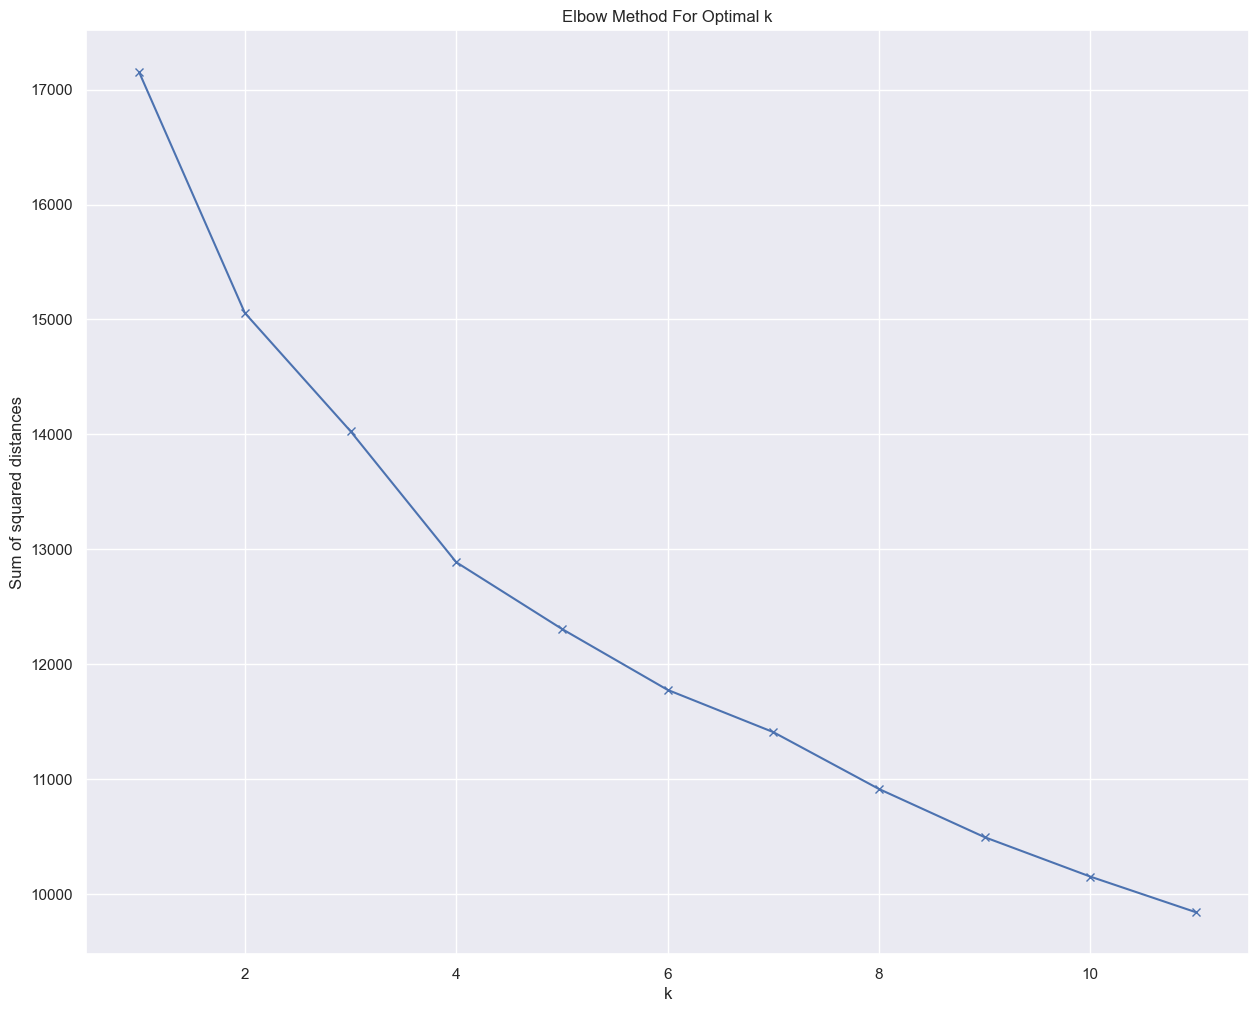

In [32]:
K = range(1,12)
X = preprocessor.fit_transform(kmeans_data)
SSD = []
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    SSD.append(km.inertia_)

plt.plot(K, SSD, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [34]:
X = preprocessor.fit_transform(kmeans_data)

n_clusters = 2  # Choose based on elbow method and silhoutte method
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_data['cluster'] = kmeans.fit_predict(X)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [35]:
from sklearn.metrics import silhouette_score
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_data)
kmeans_kwargs = {
       "init": "random",
       "n_init": 10,
        "max_iter": 300,
        "random_state": 42,
   }
silhouette_coefficients = []
for k in range(2, 25):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows wi

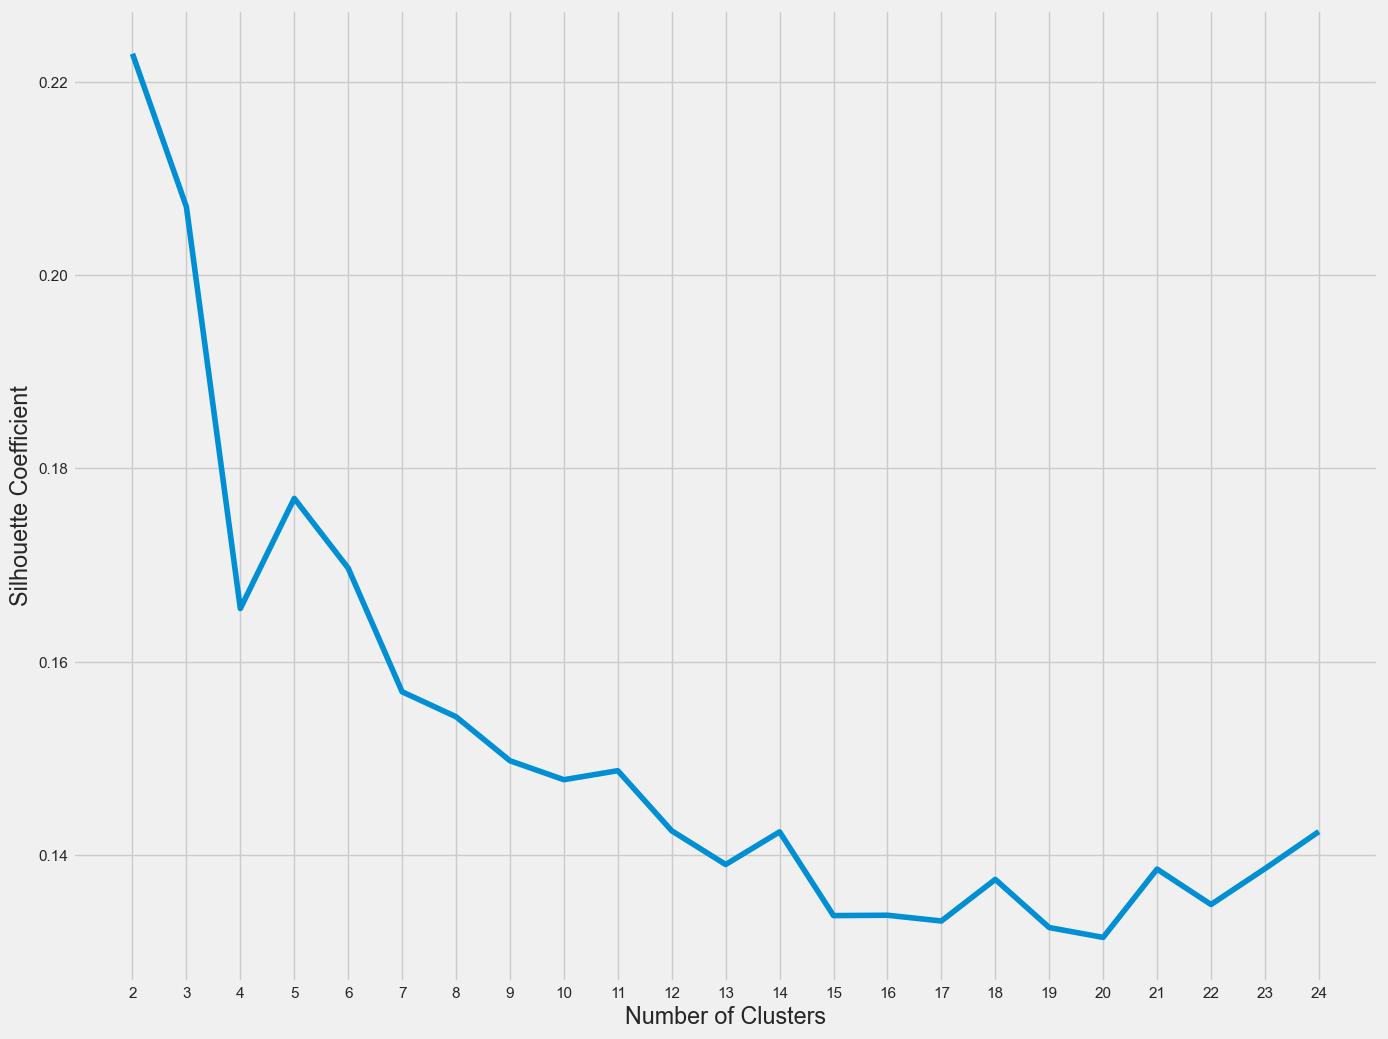

In [36]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 25), silhouette_coefficients)
plt.xticks(range(2, 25))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

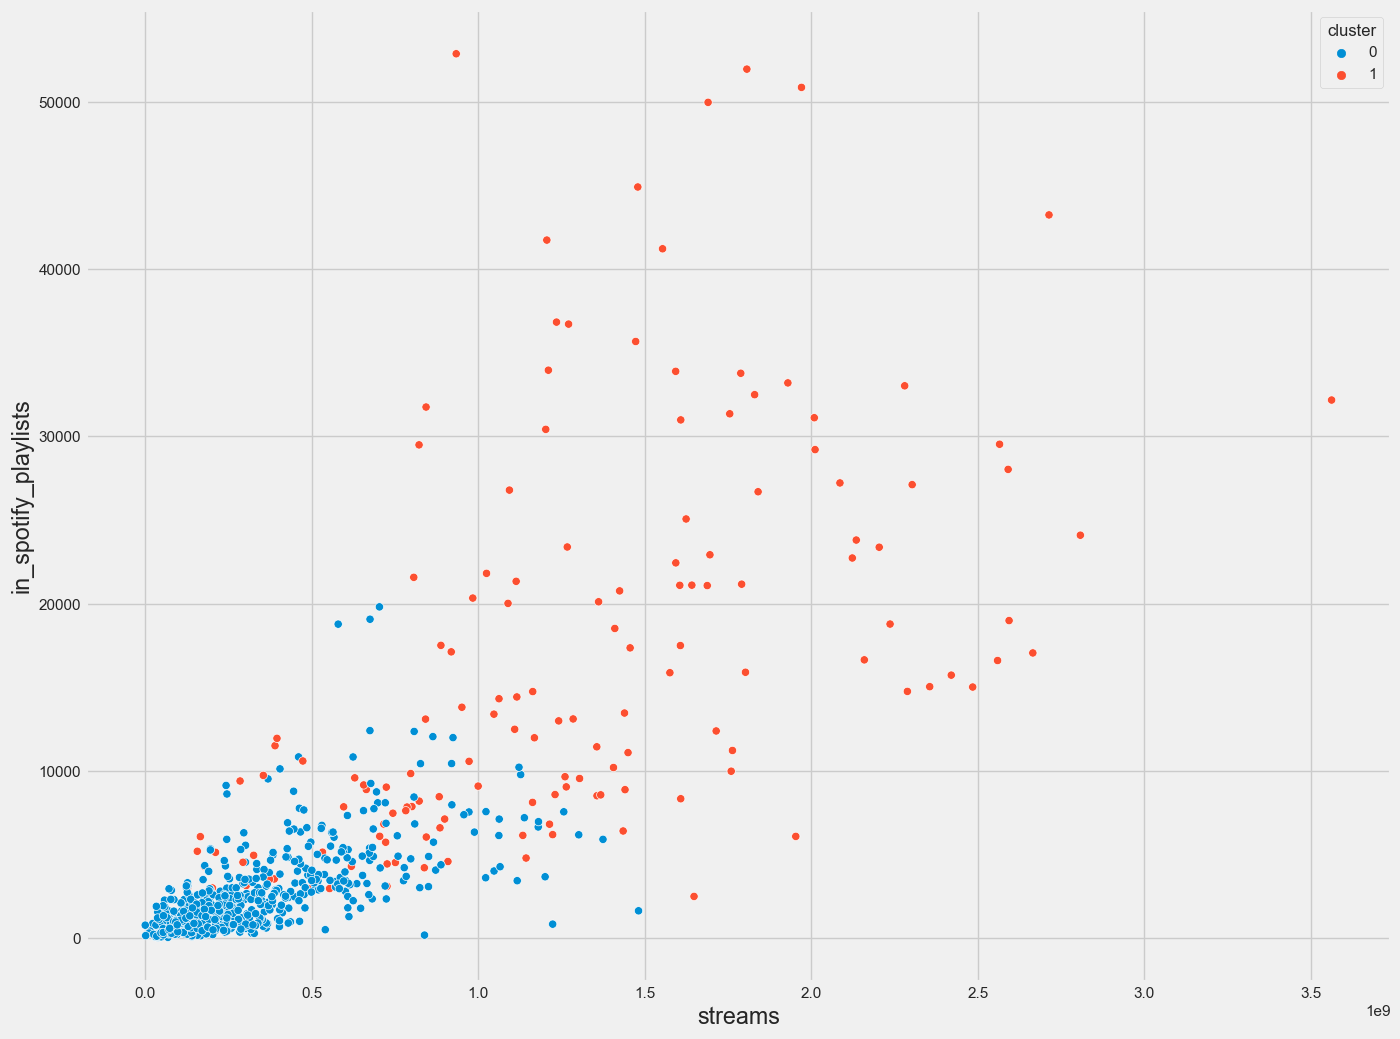

In [37]:
sns.scatterplot(data = kmeans_data, y = 'in_spotify_playlists', x = 'streams', hue = 'cluster')
plt.show()